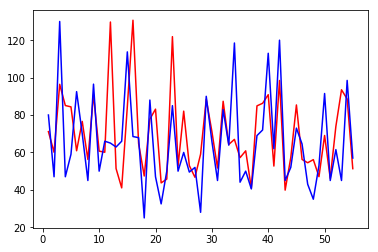

In [52]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt

df = pd.read_csv("Housing Price data set.csv")

df['lotsize'] = df['lotsize'].div(1000)
df['price'] = df['price'].div(1000)

X = df[['lotsize', 'bedrooms']].values
xsize = X.shape[0]
x1 = np.ones((xsize,1))
X = np.append(x1, X, axis=1)
y = df[['price']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)


# cal w
def calweight(X, x, t):
#     for it in range(X.shape[0])
    return np.exp( -np.dot( np.transpose(X - x), (X - x) ) / ( 2*(t**2) ) )



# for it in range( X_test.shape[0] ):
#     w1 = calweight(X, X_test[it], t)
#     print(w1)

t = 0.5
y_pred = np.zeros((X_test.shape[0],))
for it1 in range( X_test.shape[0] ):    
    w1=np.zeros(( X_train.shape[0] , X_train.shape[0]))
    
    for it2 in range( X_train.shape[0] ):
        w1[it2][it2] = calweight(X_train[it2], X_test[it1], t)
        
    z1 = np.dot( np.transpose(X_train), w1 )
    z2 = np.dot( (z1), X_train )
    z3 = np.linalg.inv(z2)
    
    z4 = np.dot( np.transpose(X_train), w1 )
    z5 = np.dot( (z4), y_train )
    wt = np.dot( np.transpose(z3), z5 )
    
    xi = X_test[it1].reshape( X_test[it1].shape[0], 1 )
#     print( xi , wt.shape)
    y_pred[it1] = np.dot( np.transpose(xi), wt)
    


# y_pred = np.dot( X_test, W)
y_size= y_pred.shape[0]
c = np.linspace(1, y_size, y_size)
plt.plot(c, y_pred, 'r') 
plt.plot(c, y_test, 'b')
plt.show()
    


In [53]:
def calcost(y_pred, y_test):
    return math.sqrt( np.sum((y_pred - y_test)**2) / len(y_pred) )

calcost(y_pred, y_test)

241.42298175884264

In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12099995117720463